# Análsis de Datos con Python
### Ariel Palazzesi - 2025


# CLASE 10

### Introducción a la Visualización de Datos
La visualización de datos es una herramienta poderosa que permite **representar
información de manera gráfica**.  Utilizando librerías como **Matplotlib** y **Seaborn** en Python, podemos crear una variedad de gráficos que facilitan la comprensión de nuestros datos.



### Ejemplo de Visualización con Matplotlib
Primero, presentaremos un ejemplo práctico. Supongamos que tenemos un
conjunto de datos que contiene información sobre las ventas de diferentes
productos. Cargaremos este conjunto de datos y crearemos un gráfico de barras
para visualizar las ventas por producto.

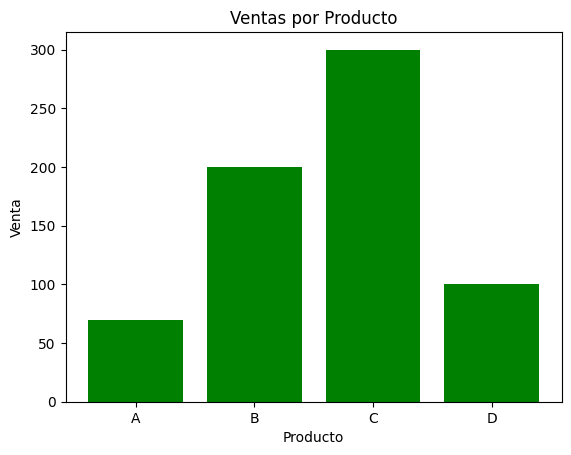

In [1]:
# Importamos las librerías/Módulos
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
data = {
  'Producto': ['A', 'B', 'C', 'D'],
  'Ventas': [70, 200, 300, 100]
}
df = pd.DataFrame(data)

# Crear un gráfico de barras
plt.bar(df['Producto'], df['Ventas'], color='green')
plt.title('Ventas por Producto')
plt.xlabel('Producto')
plt.ylabel('Venta')
plt.show()

En este gráfico, cada barra representa las ventas de un producto específico. La
visualización inmediata nos permite ver qué productos están vendiendo más y
cuáles menos, facilitando así la toma de decisiones.

----

# Ejemplo de Visualización con Seaborn
**Seaborn, que se basa en Matplotlib**, ofrece una interfaz más sencilla para crear gráficos estadísticos. Continuando con nuestro conjunto de datos anterior, podemos usar Seaborn para crear un gráfico de distribución:

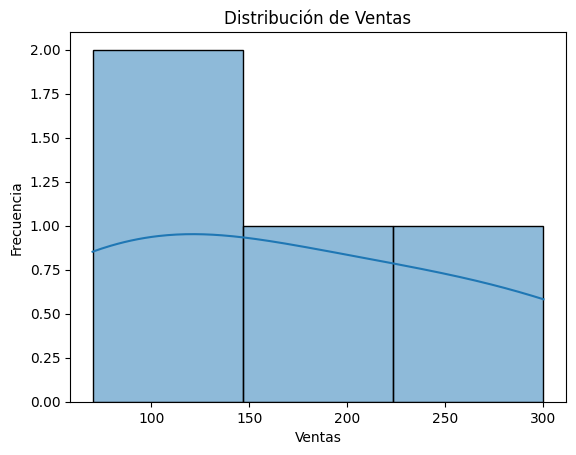

In [2]:
# Importamos las librerías/Módulos
import seaborn as sns

# Crear un gráfico de distribución de ventas
sns.histplot(df['Ventas'], bins=3, kde=True)
plt.title('Distribución de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.show()

### Tips

```python
sns.histplot(df['Ventas'], bins=4, kde=True)
```

Esta línea utiliza **Seaborn** para generar un **histograma** de la columna `'Ventas'` del DataFrame `df`.

* `df['Ventas']` es la **serie de datos** que queremos graficar.
* `bins=4` indica que el rango de valores se va a dividir en **4 intervalos** .
  Cada barra del histograma representará cuántos datos caen dentro de cada intervalo.
* `kde=True` agrega una **curva de densidad suavizada** (KDE, *Kernel Density Estimate*) sobre el histograma, que muestra de manera continua cómo se distribuyen los valores.

---

### **Parámetro `bins`**

El argumento `bins` controla **cuántas divisiones** tendrá el histograma.
Podemos usar distintos tipos de valores:

* Un número entero (`bins=4`), define directamente la cantidad de barras.
* Una lista de valores define los límites exactos de los intervalos, por ejemplo:

  ```python
  sns.histplot(df['Ventas'], bins=[0, 100, 200, 300, 400])
  ```
* Una regla automática: Seaborn (y Matplotlib) también acepta opciones como:

  * `'auto'` (predeterminado)
  * `'sturges'`
  * `'fd'` (*Freedman-Diaconis*)
  * `'doane'`, `'scott'`, `'rice'`, etc.

Estas reglas ajustan automáticamente el número de barras según la cantidad de datos y su dispersión.



Primeras filas del dataset:
   Ventas
0  224.84
1  193.09
2  232.38
3  276.15
4  188.29


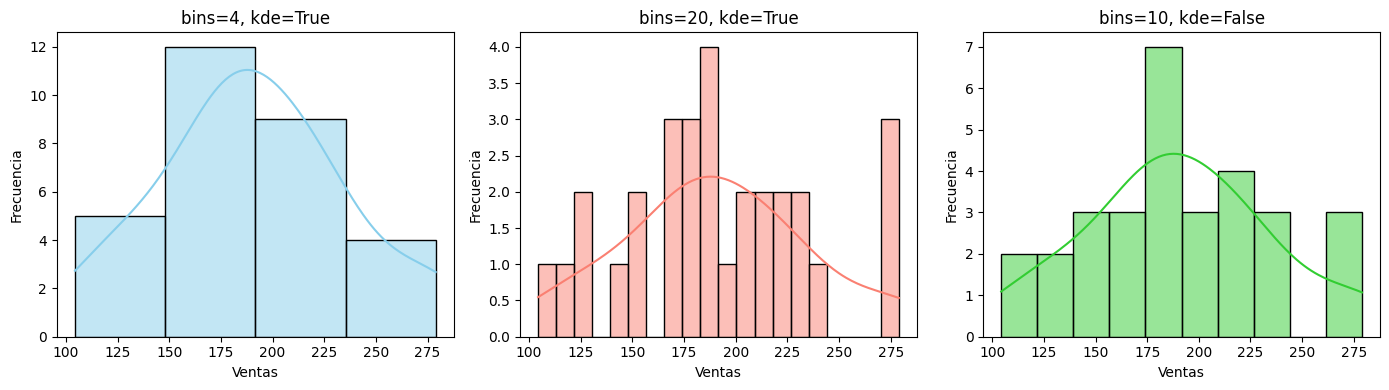

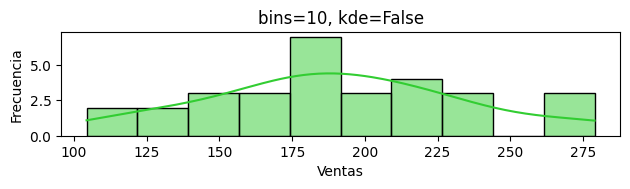

In [3]:
# ------------------------------------------------------------
# Ejemplo: Histograma de Ventas con Seaborn
# ------------------------------------------------------------

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1. Crear un DataFrame con datos simulados
# ------------------------------------------------------------
np.random.seed(42)  # para que los resultados sean reproducibles

# Simulamos 30 valores de "ventas" con una distribución normal
# (media, desviacion, cantidad de valores)
ventas = np.random.normal(loc=200, scale=50, size=30).round(2)
df = pd.DataFrame({'Ventas': ventas})

print("Primeras filas del dataset:")
print(df.head())

# ------------------------------------------------------------
# 2. Crear los tres histogramas
# ------------------------------------------------------------
plt.figure(figsize=(14,4))

# ---- Histograma 1: pocos bins ----
plt.subplot(1, 3, 1)
sns.histplot(df['Ventas'], bins=4, kde=True, color='skyblue')
plt.title('bins=4, kde=True')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')

# ---- Histograma 2: muchos bins ----
plt.subplot(1, 3, 2)
sns.histplot(df['Ventas'], bins=20, kde=True, color='salmon')
plt.title('bins=20, kde=True')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')

# ---- Histograma 3: sin KDE ----
plt.subplot(1, 3, 3)
sns.histplot(df['Ventas'], bins=10, kde=True, color='limegreen')
plt.title('bins=10, kde=False')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')

plt.tight_layout() # ajuste automáticamente
plt.show()

# ---- Histograma 3: sin KDE ----
plt.subplot(3, 1, 1)
sns.histplot(df['Ventas'], bins=10, kde=True, color='limegreen')
plt.title('bins=10, kde=False')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')

plt.tight_layout() # ajuste automáticamente
plt.show()

## Ejemplo "Propinas" con Seaborn

En esta sección, realizaremos un análisis exploratorio utilizando la base de datos "tips" de Seaborn. Esta base de datos recopila información sobre las propinas que se dejan en un restaurante, incluyendo datos como el total de la cuenta, el porcentaje de propina, el día de la semana, y la cantidad de personas en la mesa.

Primero, cargaremos el conjunto de datos y realizaremos diferentes análisis y
visualizaciones para extraer información significativa.

### A. Cargar la Base de Datos
Comenzamos importando las librerías necesarias y cargando la base de datos "tips":

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Cargar la base de datos tips de Seaborn
tips = sns.load_dataset("tips")

# Visualizar las primeras filas del DataFrame
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


**Hallazgos Iniciales:**

La base de datos contiene las siguientes columnas:

* **total_bill:** Monto total de la cuenta.

* **tip:** Monto de la propina.

* **sex:** Género del cliente.

* **smoker:** Indica si el cliente es fumador o no.

* **day:** Día de la semana.

* **time:** Hora de la comida (almuerzo o cena).

* **size:** Número de personas en la mesa.


### B. Resumen Estadístico de los Datos
Generamos un resumen estadístico básico para comprender la distribución de los
datos:

In [5]:
# Obtener un resumen estadístico
print(tips.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


**Observaciones:**

* **Total de la cuenta (total_bill):** Varía entre 3.07 y 50.81, con un promedio de aproximadamente 19.79.

* **Propina (tip):** Oscila entre 1.00 y 10.00, con un promedio de 2.99.

* **Número de personas en la mesa (size):** Varía de 1 a 6, con una media de aproximadamente 2.57.

### C. Análisis de Distribución
A continuación, analizamos la **distribución de las propinas y el total de la cuenta** utilizando histogramas:

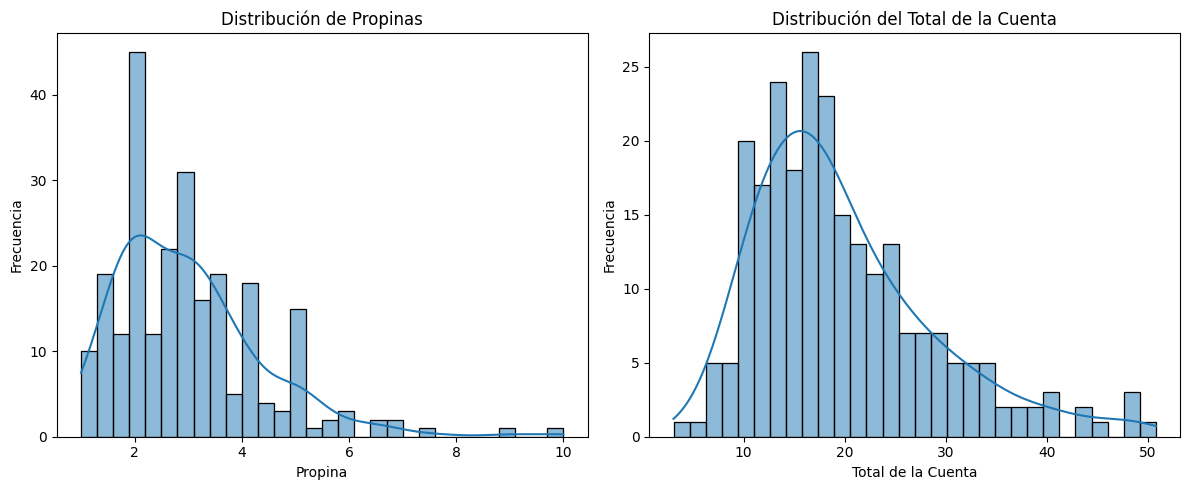

In [6]:
# Visualizar la distribución de las propinas
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(tips['tip'], bins=30, kde=True)
plt.title('Distribución de Propinas')
plt.xlabel('Propina')
plt.ylabel('Frecuencia')

# Visualizar la distribución del total de la cuenta
plt.subplot(1, 2, 2)
sns.histplot(tips['total_bill'], bins=30, kde=True)
plt.title('Distribución del Total de la Cuenta')
plt.xlabel('Total de la Cuenta')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

### Distribución de Propinas

La distribución de las propinas muestra un **sesgo hacia la derecha** (asimetría positiva).
Esto significa que la mayoría de las propinas son **relativamente bajas**, y que existen algunos valores más altos pero poco frecuentes.

* La **mayor concentración** de observaciones se encuentra entre **2 y 4 dólares**, aproximadamente.
* El hecho de que haya una “cola larga” hacia la derecha indica que **en algunos casos se dejan propinas mucho mayores al promedio**, aunque son excepcionales.
* El gráfico KDE (la curva azul) refuerza esta idea, mostrando un único pico (distribución unimodal) y una larga caída hacia valores grandes.

#
### Distribución del Total de la Cuenta

En cambio, la distribución del **total de la cuenta** también tiene **asimetría positiva**, pero menos pronunciada.
Esto indica que la mayoría de las cuentas se concentran en valores **moderados (alrededor de 10 a 20 dólares)**, y que hay **algunas pocas cuentas mucho más altas**, que empujan la cola del gráfico hacia la derecha.

* La forma es más “suave” y cercana a una **distribución normal truncada**, aunque todavía con una ligera cola larga.
* Esto sugiere que la mayoría de los clientes gastan montos dentro de un rango razonable, y que las cuentas muy altas son excepcionales (quizás mesas grandes o pedidos con bebidas).

Veamos cómo examinar la distribución con BoxPlot:

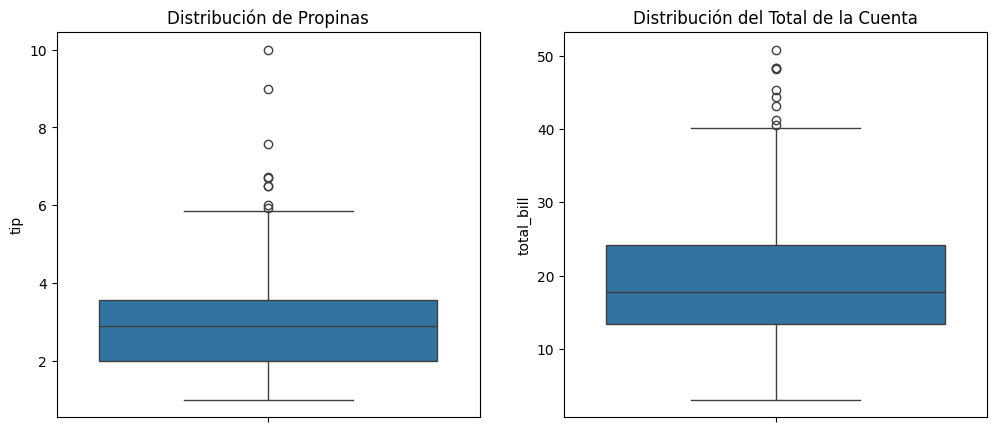

In [7]:
# Visualizar la distribución de las propinas
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(tips['tip'])
plt.title('Distribución de Propinas')

# Visualizar la distribución del total de la cuenta
plt.subplot(1, 2, 2)
sns.boxplot(tips['total_bill'])
plt.title('Distribución del Total de la Cuenta')
plt.show()

### Distribución de Propinas

* El **cajón** central representa el **50 % de los datos** (entre el primer y tercer cuartil).
* La **línea dentro del cajón** es la **mediana**, alrededor de **3 USD**.
* La **altura del cajón** indica que las propinas varían moderadamente entre **2 y 4 USD**.
* Los **puntos por encima del bigote superior** son **valores atípicos** (*outliers*), es decir, propinas inusualmente altas (6, 8, hasta 10 USD).
* No hay outliers por debajo, lo que refuerza que las propinas pequeñas (1 a 2 USD) son comunes pero no extremas.

> La mayoría de las propinas están concentradas entre 2 y 4 USD, con unos pocos casos excepcionalmente generosos.

---

### Distribución del Total de la Cuenta

* La **mediana** está alrededor de **18–20 USD**.
* El **rango intercuartílico (IQR)** es amplio: muchas cuentas oscilan entre **13 y 25 USD**.
* Existen **outliers hacia arriba**, alcanzando **50 USD o más**, que representan mesas grandes o consumos altos.
* No hay valores atípicos por debajo del rango, lo que indica que las cuentas pequeñas son raras, pero no extremas.

> Los montos de las cuentas son más dispersos que las propinas; algunos clientes gastan mucho más que el promedio.

---

### Relación entre ambas variables

Ambos boxplots reflejan **asimetría positiva** (colas largas hacia arriba), coherente con los histogramas anteriores.
Este patrón nos sugiere que **los valores altos en “total_bill” tienden a acompañarse de valores altos en “tip”**, aunque con bastante variabilidad: no todos los clientes que gastan más dejan proporcionalmente más propina.


## **Gráfico de dispersión** (Scatterplot)

Para visualizar la (posible) correlación entre la propina y el total de la cuenta, la forma más directa y clara es usar un gráfico de dispersión (scatter plot).
Este tipo de gráfico muestra cada observación como un punto, donde:

* El eje X representa el total de la cuenta.

* El eje Y representa la propina.

* Cada punto representa un cliente o una transacción.

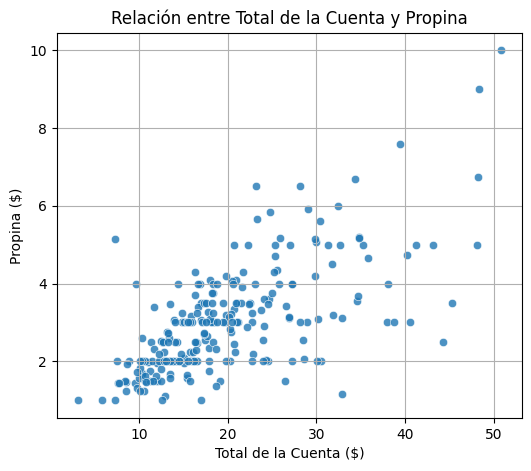

In [8]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=tips, x='total_bill', y='tip', alpha=0.8)
plt.title('Relación entre Total de la Cuenta y Propina')
plt.xlabel('Total de la Cuenta ($)')
plt.ylabel('Propina ($)')
plt.grid(True)
plt.show()

### Interpretación

* Si los puntos tienden a alinearse en una **diagonal ascendente**, significa que **a mayor total de la cuenta, mayor propina**: una **correlación positiva**.
* Si los puntos estuvieran completamente dispersos sin una tendencia clara, la correlación sería débil o nula.
* Si queremos ver además la **tendencia promedio**, se puede agregar una **línea de regresión**:

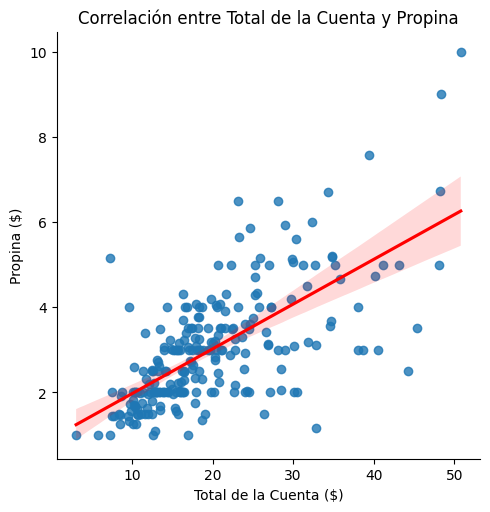

In [9]:
sns.lmplot(data=tips, x='total_bill', y='tip', line_kws={'color':'red'})
plt.title('Correlación entre Total de la Cuenta y Propina')
plt.xlabel('Total de la Cuenta ($)')
plt.ylabel('Propina ($)')
plt.show()

Esa línea roja indica la **tendencia lineal general**: su pendiente te da una idea del grado de correlación.

En el dataset puede observarse una correlación positiva moderada (quienes gastan más, dejan propinas más altas).


### Conclusiones Generales
1. **Distribución de Propinas:** La mayoría de las propinas son relativamente
bajas, lo que podría implicar que muchos clientes optan por dejar propinas
menores a 5.

2. **Relación Total de la Cuenta y Propina:** Existe una relación positiva clara
entre el total de la cuenta y la propina; donde las cuentas más altas tienden a
recibir propinas más altas.

3. **Días de Mayor Actividad:** Las propinas parecen ser mayores durante los
fines de semana, lo que podría relacionarse con un mayor flujo de clientes o
el deseo de brindar un mejor servicio.

4. **Correlación:** La correlación observada entre el total de la cuenta y la propina es un indicador importante para entender las expectativas de los clientes respecto a la propina.